In [ ]:
!pip install missingno

In [3]:
# importing standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Fuel.csv

In [4]:
# Load the dataset
fuel_data = pd.read_csv('Data/Fuel.csv')

# Display the first few rows of the dataframe
fuel_data.head()

,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Fuel.Type,Specific.Fuel.Type,Other.Fuel.Name,Blend.Fuel.Name,Methane.emissions,Nitrous.Oxide.emissions
0,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,16.5,20.86
1,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2302,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,15.0,17.88
2,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
3,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
4,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,11.0,11.92


### Features of Fuel.csv

From the Problem Statement Document:

**Industry information**: 
- Facility.Id: identification number of the industry 

- FRS.Id (Facility Registry Service): identifies and geospatially locates facilities subject to  environmental regulations or of environmental interest 

- Facility.Name: name of the company 

- City 

- State 

- Primary.NAICS.Code: a number used to indicate a company’s primary line of business - Year 

- Industry.Type 

- Sector 

- Unit.Name: industry classification based on what they produce

**Types of Fuel used by industry’s production**: 


- Fuel.Type: the energy provided to the process 

- Specific.Fuel.Type 

- Other.Fuel.Name 

- Blend.Fuel.Name 

**Gas emissions**: 
- Methane.emissions: quantity of methane emissions measured in metric tons - Nitrous.Oxide.emissions: quantity of nitrous oxide emissions measured in metric tons 


### Summary Statistics and Missing Values

In [14]:

# Summary statistics of the dataset
summary_statistics = fuel_data.describe().style.format("{:.2f}")
summary_statistics

,Facility.Id,FRS.Id,Primary.NAICS.Code,Year,Methane.emissions,Nitrous.Oxide.emissions
count,271087.00,271087.00,271087.00,271087.00,271087.00,271087.00
mean,1003882.59,109988520422.23,336164.10,2016.14,186.84,391.66
std,2601.77,1993334618.68,145848.77,3.46,1128.32,2225.71
min,1000001.00,7878.00,111419.00,2010.00,0.00,0.00
25%,1001373.00,110002000000.00,221112.00,2013.00,0.00,0.00
50%,1003647.00,110031000000.00,322121.00,2016.00,2.00,2.98
75%,1006362.00,110044000000.00,331111.00,2019.00,23.50,32.18
max,1009520.00,110044000000.00,928110.00,2022.00,51300.25,141043.40


The summary statistics for the numerical columns in the `Fuel.csv` dataset are as follows:

- `Facility.Id`: Range from 1,000,001 to 1,009,520.
- `FRS.Id`: Range from 7,878 to 1.10044e+11.
- `Primary.NAICS.Code`: Range from 111419 to 928110, with a median value of 322121.
- `Year`: Data from the years 2010 to 2022.
- `Methane.emissions`: Range from 0 to 51,300.25, with a median of 2.
- `Nitrous.Oxide.emissions`: Range from 0 to 141,043.4, with a median of 2.98.


Facility.Id                     0
FRS.Id                          0
Facility.Name                   0
City                            0
State                           0
Primary.NAICS.Code              0
Year                            0
Industry.Type                   0
Sector                         20
Unit.Name                       0
Fuel.Type                      22
Specific.Fuel.Type            206
Other.Fuel.Name            269756
Blend.Fuel.Name            270617
Methane.emissions               0
Nitrous.Oxide.emissions         0
dtype: int64

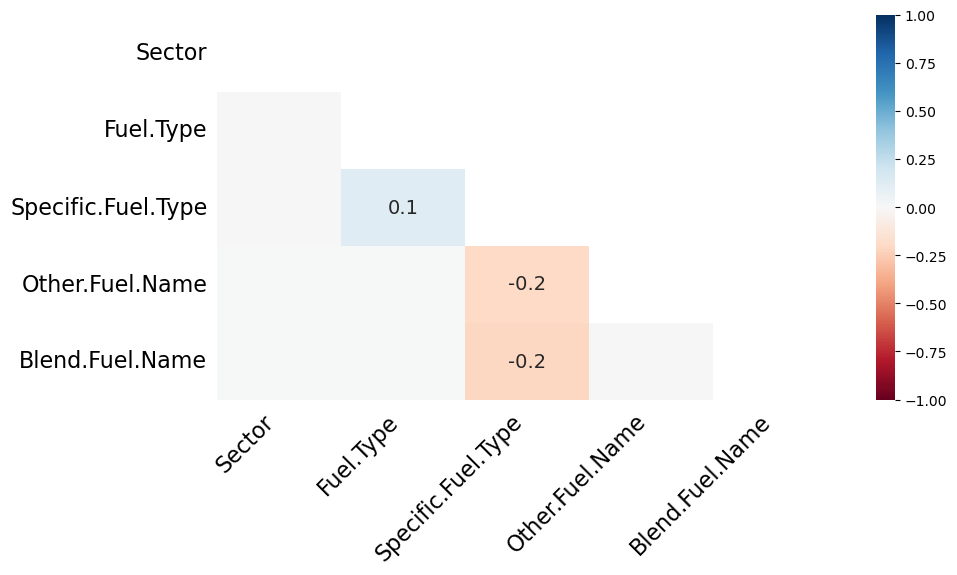

In [6]:
# Check for missing values in the dataset
import missingno as msno # missingno package is used to visualize missing data

missing_values = fuel_data.isnull().sum()

# Visualize the missing values and their correlations using a heatmap
msno_heatmap = msno.heatmap(fuel_data, figsize=(10, 5))

# Display summary statistics and missing values
missing_values

### Unique Values 

In [5]:
# check for unique values in state, industry, and fuel type
unique_values = fuel_data.nunique()
unique_values

Facility.Id                 5846
FRS.Id                        45
Facility.Name               6381
City                        3002
State                         54
Primary.NAICS.Code           297
Year                          13
Industry.Type                138
Sector                        69
Unit.Name                  18674
Fuel.Type                      8
Specific.Fuel.Type            62
Other.Fuel.Name              230
Blend.Fuel.Name              107
Methane.emissions          12271
Nitrous.Oxide.emissions    12481
dtype: int64

In [16]:
# Can look at 8 unique values of Fuel Type
fuel_data['Fuel.Type'].unique()

array(['Natural Gas', 'Petroleum Products', 'Other', 'Coal', 'Fuel Gas',
       'Natural Gas ', nan, 'Biomass', 'Solid Byproducts'], dtype=object)

## Data Visualizations

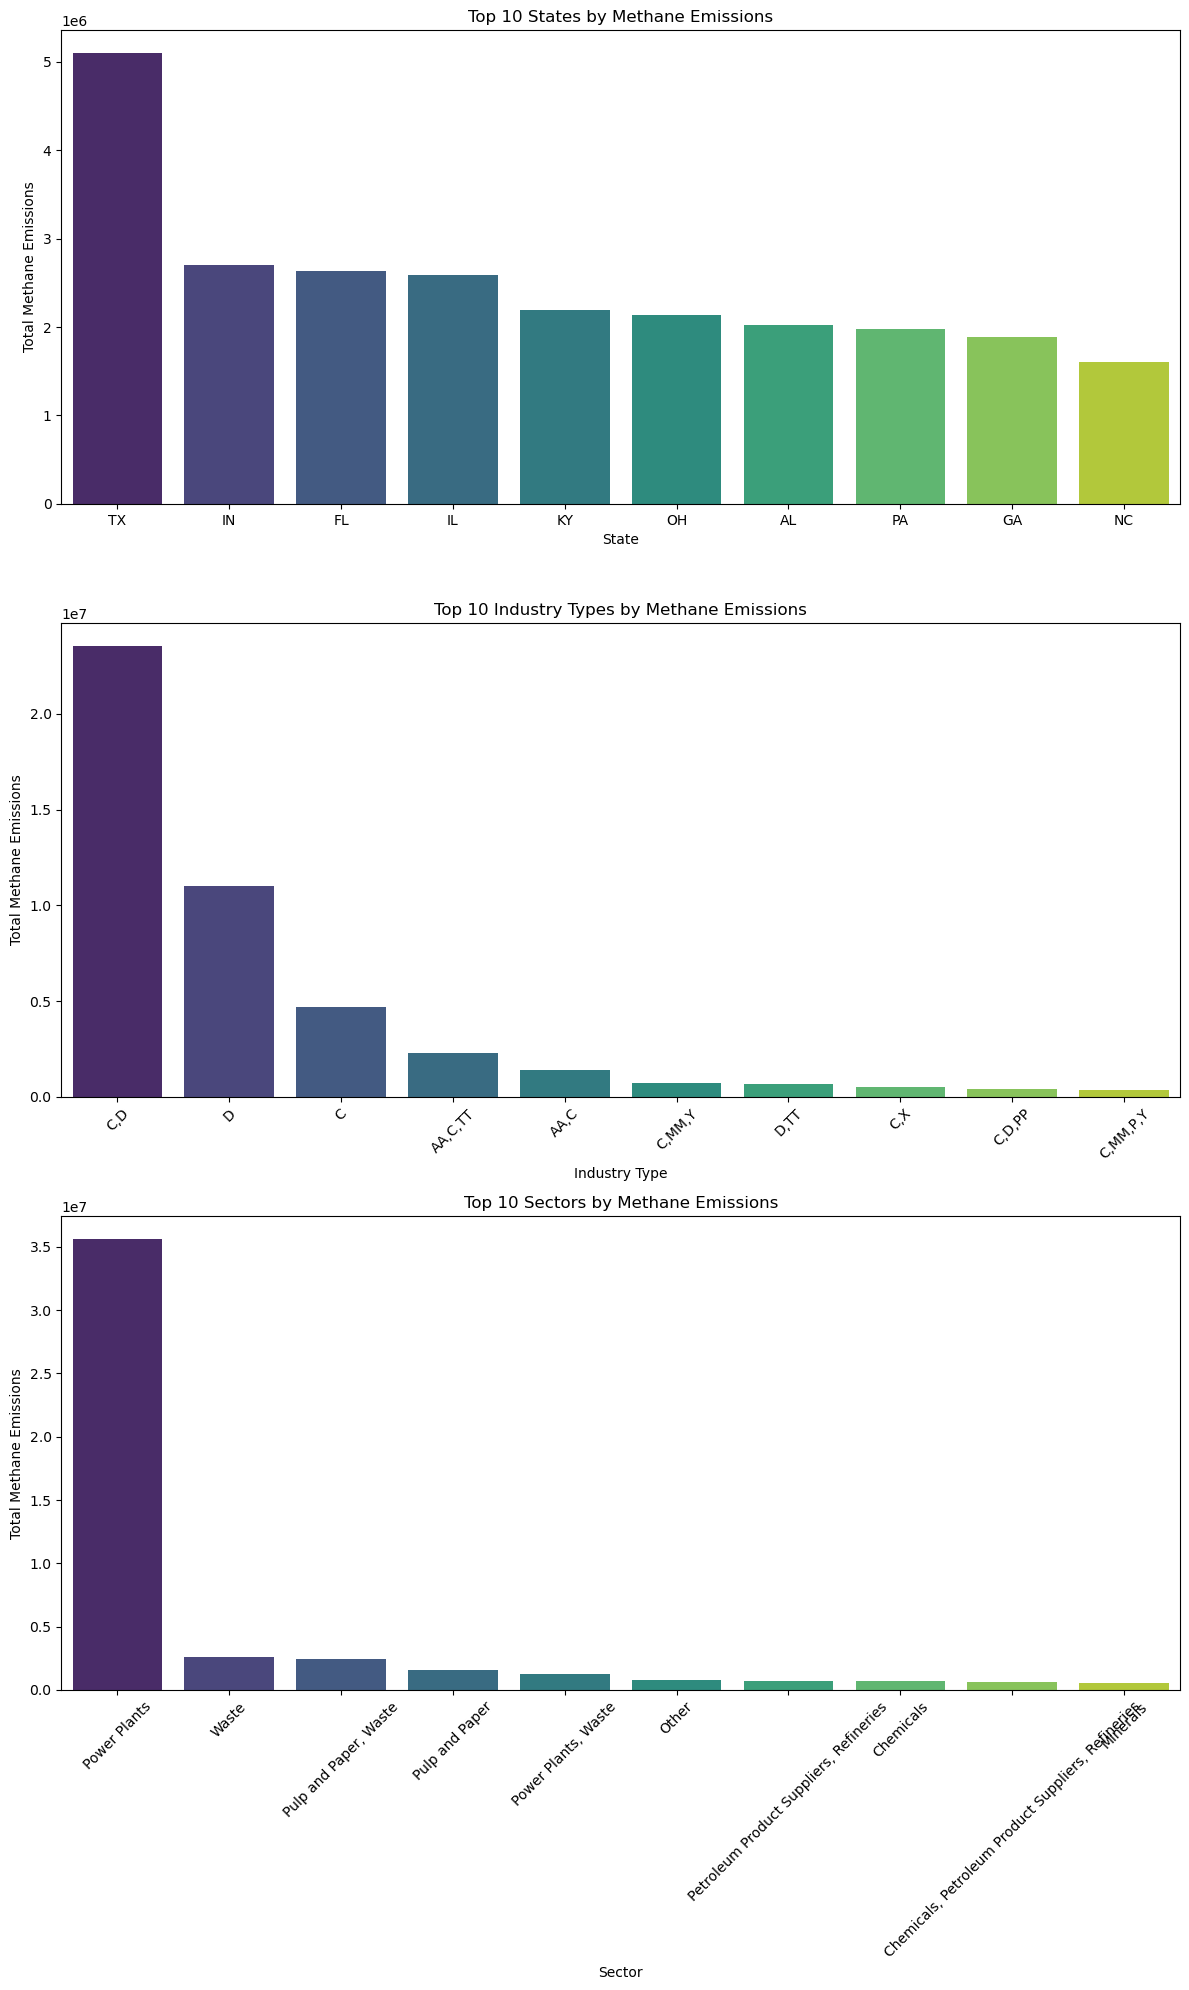

In [12]:
# Since there might be a lot of unique states, industry types, and sectors,
# we will visualize the top ones where emissions are the highest.

# First, we aggregate the data by state, industry type, and sector to sum up the emissions.
state_emissions = fuel_data.groupby('State').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()
industry_emissions = fuel_data.groupby('Industry.Type').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()
sector_emissions = fuel_data.groupby('Sector').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()

# Then, we sort the aggregated data to find the top emitters.
top_states_by_emissions = state_emissions.sort_values(by='Methane.emissions', ascending=False).head(10)
top_industries_by_emissions = industry_emissions.sort_values(by='Methane.emissions', ascending=False).head(10)
top_sectors_by_emissions = sector_emissions.sort_values(by='Methane.emissions', ascending=False).head(10)

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 20))

# Plotting the emissions by state
sns.barplot(ax=axes[0], x='State', y='Methane.emissions', data=top_states_by_emissions, palette='viridis')
axes[0].set_title('Top 10 States by Methane Emissions')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Methane Emissions')

# Plotting the emissions by industry type
sns.barplot(ax=axes[1], x='Industry.Type', y='Methane.emissions', data=top_industries_by_emissions, palette='viridis')
axes[1].set_title('Top 10 Industry Types by Methane Emissions')
axes[1].set_xlabel('Industry Type')
axes[1].set_ylabel('Total Methane Emissions')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the emissions by sector
sns.barplot(ax=axes[2], x='Sector', y='Methane.emissions', data=top_sectors_by_emissions, palette='viridis')
axes[2].set_title('Top 10 Sectors by Methane Emissions')
axes[2].set_xlabel('Sector')
axes[2].set_ylabel('Total Methane Emissions')
axes[2].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


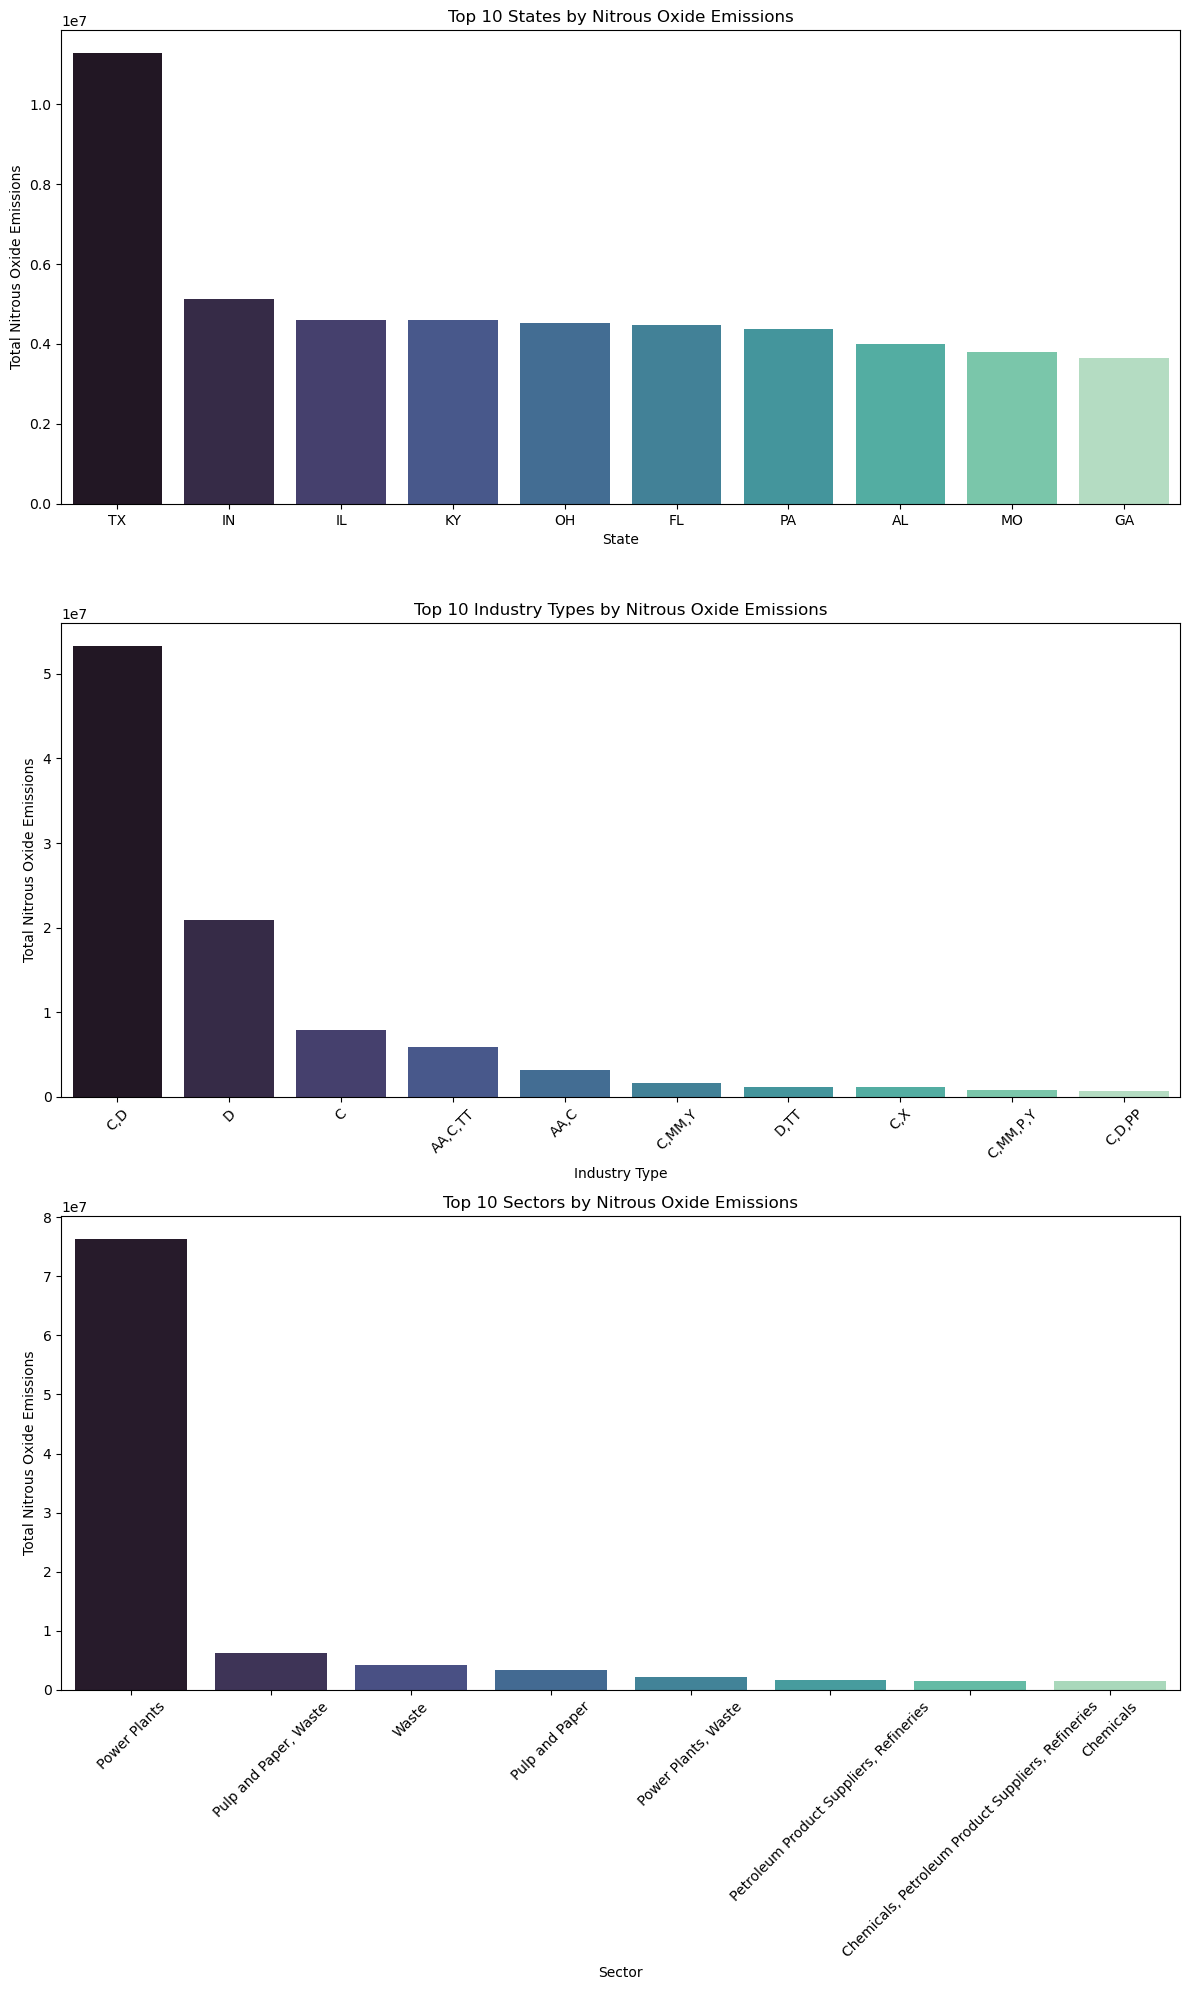

In [22]:
# Sorting the aggregated data to find the top emitters for Nitrous Oxide.
top_states_by_n2o_emissions = state_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(10)
top_industries_by_n2o_emissions = industry_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(10)
top_sectors_by_n2o_emissions = sector_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(8)

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 20))

# Plotting the Nitrous Oxide emissions by state
sns.barplot(ax=axes[0], x='State', y='Nitrous.Oxide.emissions', data=top_states_by_n2o_emissions, palette='mako')
axes[0].set_title('Top 10 States by Nitrous Oxide Emissions')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Nitrous Oxide Emissions')

# Plotting the Nitrous Oxide emissions by industry type
sns.barplot(ax=axes[1], x='Industry.Type', y='Nitrous.Oxide.emissions', data=top_industries_by_n2o_emissions, palette='mako')
axes[1].set_title('Top 10 Industry Types by Nitrous Oxide Emissions')
axes[1].set_xlabel('Industry Type')
axes[1].set_ylabel('Total Nitrous Oxide Emissions')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the Nitrous Oxide emissions by sector
sns.barplot(ax=axes[2], x='Sector', y='Nitrous.Oxide.emissions', data=top_sectors_by_n2o_emissions, palette='mako')
axes[2].set_title('Top 10 Sectors by Nitrous Oxide Emissions')
axes[2].set_xlabel('Sector')
axes[2].set_ylabel('Total Nitrous Oxide Emissions')
axes[2].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


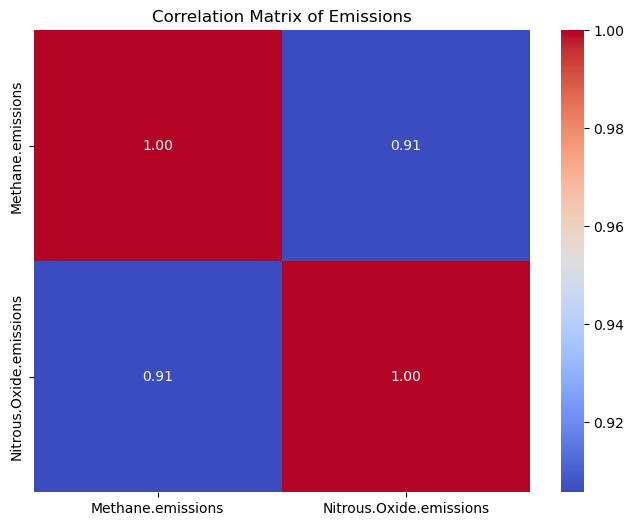

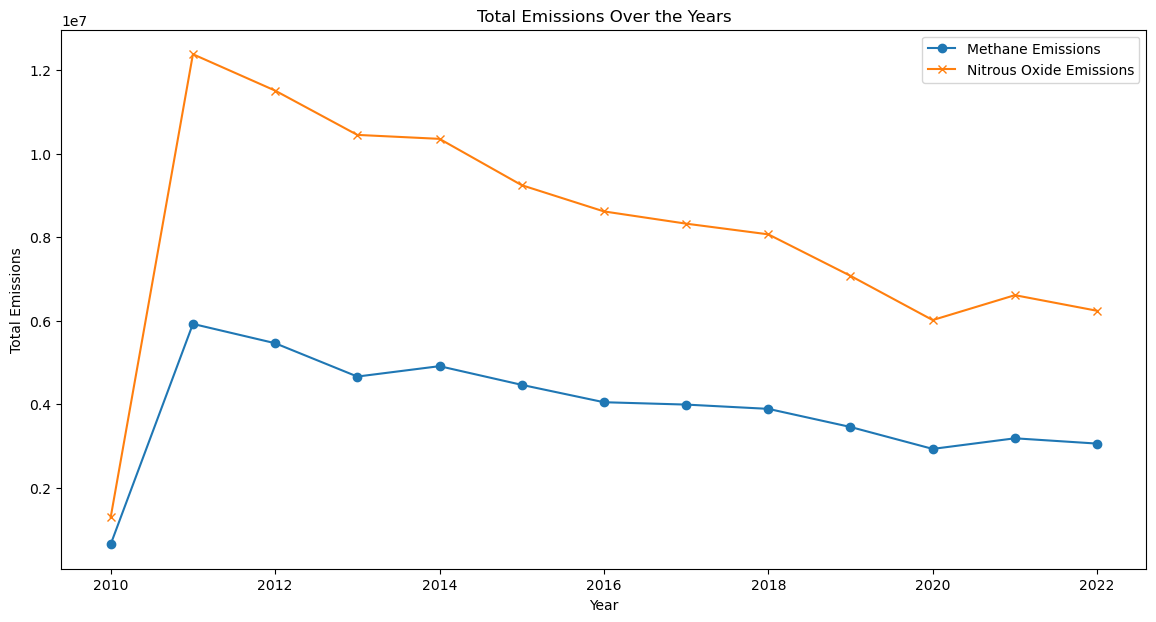

In [19]:
# Calculating the correlation matrix to understand the relationships between Methane and Nitrous
correlation_matrix = fuel_data[['Methane.emissions', 'Nitrous.Oxide.emissions']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Emissions')
plt.show()

# Let's also look at the aggregate emissions by year for any noticeable trends
yearly_emissions = fuel_data.groupby('Year').agg({'Methane.emissions':'sum', 'Nitrous.Oxide.emissions':'sum'}).reset_index()

# Plotting the total emissions over the years
plt.figure(figsize=(14, 7))
plt.plot(yearly_emissions['Year'], yearly_emissions['Methane.emissions'], marker='o', label='Methane Emissions')
plt.plot(yearly_emissions['Year'], yearly_emissions['Nitrous.Oxide.emissions'], marker='x', label='Nitrous Oxide Emissions')
plt.title('Total Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()


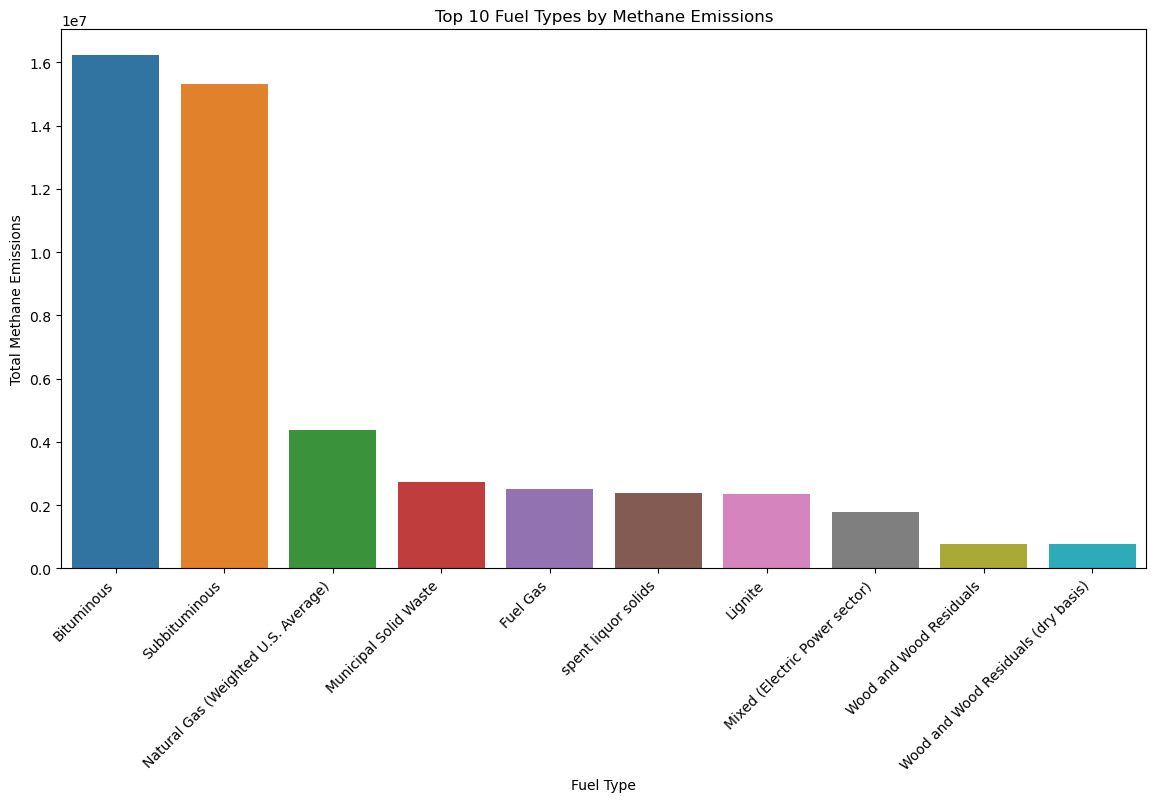

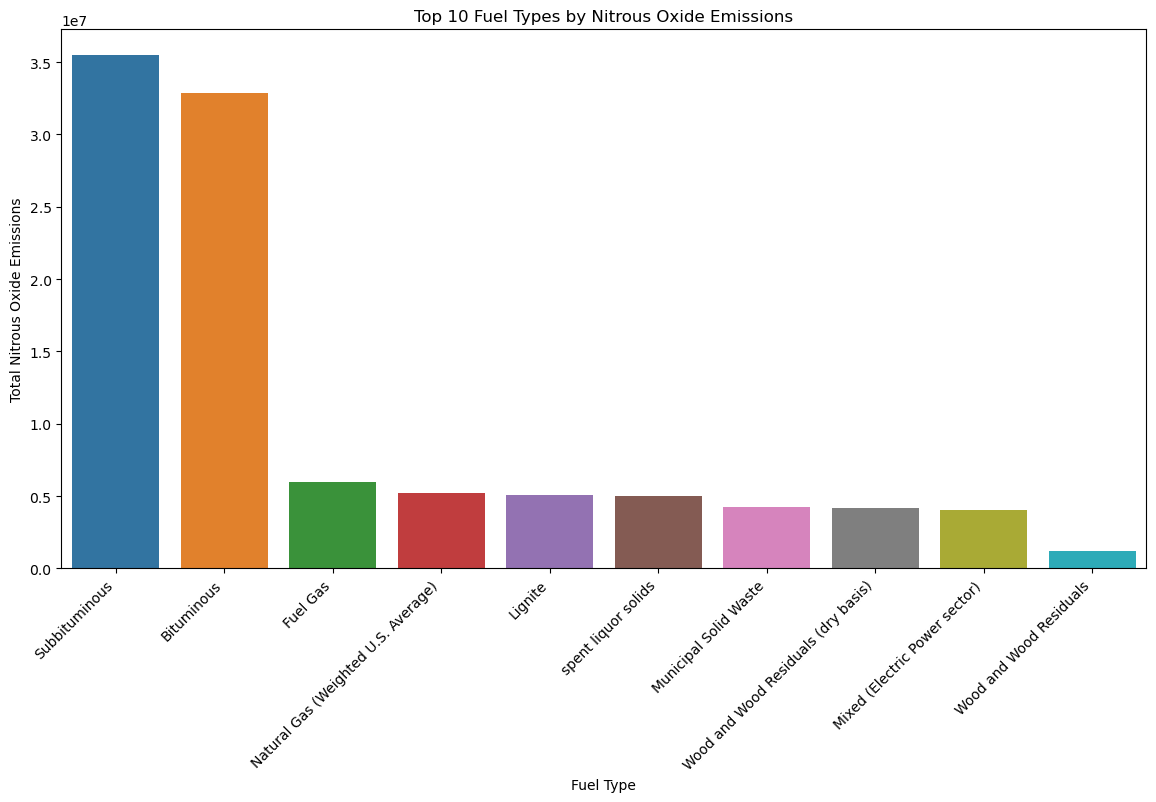

In [20]:
# First, we will aggregate the emissions by the specific fuel type to sum up the emissions.
fuel_type_emissions = fuel_data.groupby('Specific.Fuel.Type').agg({
    'Methane.emissions': 'sum', 
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

# Sort the aggregated data to find the top emitting fuels.
top_fuels_by_methane = fuel_type_emissions.sort_values(by='Methane.emissions', ascending=False).head(10)
top_fuels_by_n2o = fuel_type_emissions.sort_values(by='Nitrous.Oxide.emissions', ascending=False).head(10)

# Plotting the Methane emissions by fuel type
plt.figure(figsize=(14, 7))
sns.barplot(x='Specific.Fuel.Type', y='Methane.emissions', data=top_fuels_by_methane, palette='tab10')
plt.title('Top 10 Fuel Types by Methane Emissions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fuel Type')
plt.ylabel('Total Methane Emissions')
plt.show()

# Plotting the Nitrous Oxide emissions by fuel type
plt.figure(figsize=(14, 7))
sns.barplot(x='Specific.Fuel.Type', y='Nitrous.Oxide.emissions', data=top_fuels_by_n2o, palette='tab10')
plt.title('Top 10 Fuel Types by Nitrous Oxide Emissions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fuel Type')
plt.ylabel('Total Nitrous Oxide Emissions')
plt.show()


## To do: Statistical Analysis -> Checking significance